# Introduction to Genotype-Phenotype Map Module

This notebook a brief introduction to how the genotype-phenotype map module works. 

External imports for plotting and other utilities 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Imports from `gpm` module.

In [2]:
from gpmap.utils import encode_mutations, construct_genotypes, DNA

Let's define and arbitrary space. Everything in the cell below will typically be given to you by the experimental data.

In [3]:
# Wildtype sequence
wt = "AAAAAAA"

# Micro-managing here, stating explicitly what substitutions are possible at each site.
# See documentation for more detail.
mutations = {
    0:DNA,
    1:DNA,
    2:["A","T"]
}

# Generate encoding dictionary for each mutation
encoding = encode_mutations(wt, mutations)

# Construct genotypes from every possible combination of the substitutions above.
genotypes, binary = construct_genotypes(encoding)
print(genotypes)

# Generate random phenotype values
phenotypes = np.random.rand(len(genotypes))

['AAA', 'CAA', 'GAA', 'TAA', 'ACA', 'CCA', 'GCA', 'TCA', 'AGA', 'CGA', 'GGA', 'TGA', 'ATA', 'CTA', 'GTA', 'TTA', 'AAT', 'CAT', 'GAT', 'TAT', 'ACT', 'CCT', 'GCT', 'TCT', 'AGT', 'CGT', 'GGT', 'TGT', 'ATT', 'CTT', 'GTT', 'TTT']


## Creating a Genotype-phenotype map instance

Create an instance of the GenoPhenoMap object, passing in the wildtype sequence, genotypes and their phenotypes, and the substitution map. 

In [4]:
from gpmap import GenotypePhenotypeMap

In [5]:
gpm = GenotypePhenotypeMap(wt, # wildtype sequence
                   genotypes, # genotypes
                   phenotypes, # phenotypes
                   stdeviations=None, # errors in measured phenotypes
                   log_transform=False, # Should the map log_transform the space?
                   mutations=mutations # Substitution map to alphabet 
)

In [10]:
gpm.genotypes

0     AAA
8     CAA
16    GAA
24    TAA
2     ACA
10    CCA
18    GCA
26    TCA
4     AGA
12    CGA
20    GGA
28    TGA
6     ATA
14    CTA
22    GTA
30    TTA
1     AAT
9     CAT
17    GAT
25    TAT
3     ACT
11    CCT
19    GCT
27    TCT
5     AGT
13    CGT
21    GGT
29    TGT
7     ATT
15    CTT
23    GTT
31    TTT
dtype: object

In [11]:
gpm.phenotypes

0     0.359774
1     0.123998
2     0.961551
3     0.297353
4     0.254202
5     0.300492
6     0.481804
7     0.366185
8     0.058473
9     0.827104
10    0.857249
11    0.093769
12    0.278262
13    0.146203
14    0.208120
15    0.712464
16    0.187421
17    0.238268
18    0.399313
19    0.357170
20    0.957250
21    0.706469
22    0.520430
23    0.512336
24    0.911219
25    0.854438
26    0.914308
27    0.886530
28    0.904489
29    0.689049
30    0.431133
31    0.373285
dtype: float64

In [9]:
gpm.df

,genotypes,phenotypes,stdeviations,n_replicates
0,AAA,0.359774,NaN,1
1,AAT,0.123998,NaN,1
2,ACA,0.961551,NaN,1
3,ACT,0.297353,NaN,1
4,AGA,0.254202,NaN,1
5,AGT,0.300492,NaN,1
6,ATA,0.481804,NaN,1
7,ATT,0.366185,NaN,1
8,CAA,0.058473,NaN,1
9,CAT,0.827104,NaN,1


## Construct NetworkX graph from GenoPhenoMap

`GenoPhenoMap` objects have an internal command to port to a NetworkX Graph object.

In [6]:
from networkx import draw, spring_layout

Automatically construct a graph using internal `gpm` method, `build_graph`.

In [7]:
gpm.add_networkx()

Notice, `gpm` gains a new attribute, `Graph`, containing a full NetworkX object which contains all the properties of a normal NetworkX DiGraph.

In [8]:
gpm.Graph

Attributes from the mapping objects are added to the network object when graph is constructed.

In [9]:
gpm.Graph.node[0]

{'binary': '0000000',
 'errors': None,
 'genotype': 'AAA',
 'phenotype': 0.1036429228008604,
 'value': 0.1036429228008604}

In [10]:
print(gpm.Graph.node[0])
print(gpm.Graph.edge[0][1])

{'errors': None, 'genotype': 'AAA', 'value': 0.1036429228008604, 'binary': '0000000', 'phenotype': 0.1036429228008604}
{}


Draw a graph object following standing NetworkX procedure. 

/Users/Zsailer/github/networkx/networkx/drawing/nx_pylab.py:125: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/Zsailer/github/networkx/networkx/drawing/nx_pylab.py:137: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be 

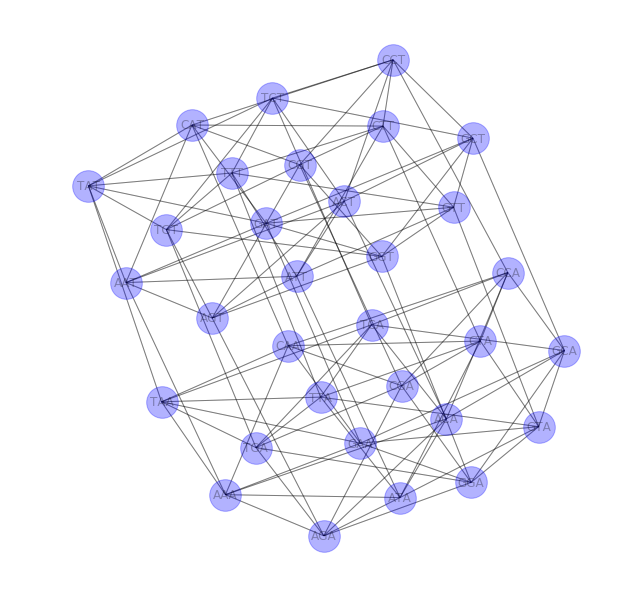

In [11]:
plt.figure(figsize=[8,8])

# Construct label dict
labels = dict([(i,gpm.Graph.node[i]["genotype"]) for i in range(len(list(gpm.Graph.nodes())))])
draw(gpm.Graph,
    with_labels=True, # add sequence labels
    node_color='b',   # color nodes blue
    labels = labels,
    pos=spring_layout(gpm.Graph), # spring loaded layout of nodes
    node_size=1000, # make node sizes bigger from default
    arrows=False,   # remove arrows from DiGraph
    alpha = 0.3     # lighten opacity of nodes
)

## Other cool functions in map object

Get mapping between attributes of the map

In [12]:
gpm.map("genotypes", "binary.genotypes")

{'AAA': '0000000',
 'AAT': '0000001',
 'ACA': '0001000',
 'ACT': '0001001',
 'AGA': '0000100',
 'AGT': '0000101',
 'ATA': '0000010',
 'ATT': '0000011',
 'CAA': '1000000',
 'CAT': '1000001',
 'CCA': '1001000',
 'CCT': '1001001',
 'CGA': '1000100',
 'CGT': '1000101',
 'CTA': '1000010',
 'CTT': '1000011',
 'GAA': '0100000',
 'GAT': '0100001',
 'GCA': '0101000',
 'GCT': '0101001',
 'GGA': '0100100',
 'GGT': '0100101',
 'GTA': '0100010',
 'GTT': '0100011',
 'TAA': '0010000',
 'TAT': '0010001',
 'TCA': '0011000',
 'TCT': '0011001',
 'TGA': '0010100',
 'TGT': '0010101',
 'TTA': '0010010',
 'TTT': '0010011'}

In [1]:
from gpmap import GenotypePhenotypeMap

# Create list of genotypes and phenotypes
wildtype = "AA"
genotypes = ["AA", "AV", "AM", "VA", "VV", "VM"]
phenotypes = [1.0, 1.1, 1.4, 1.5, 2.0, 3.0]

# Create GenotypePhenotypeMap object
gpm = GenotypePhenotypeMap(wildtype, genotypes, phenotypes)

In [3]:
gpm.indices

array([0, 1, 2, 3, 4, 5])